<a href="https://colab.research.google.com/github/99nandini/data_analytics_projects/blob/main/stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':'1Sh4I89Luf1z_4w4XdE7HfK9jPybwpQBQ'}) # replace the id with id of file you want to access
downloaded.GetContentFile('google.csv')


In [ ]:
dataset=pd.read_csv('google.csv')
dataset.head()

In [ ]:
actual_price=dataset.tail(1)
actual_price

,Date,Open,High,Low,Close,Volume,OpenInt
1564,2017-11-10,56.96,56.96,56.3909,56.4,29233,0


In [ ]:
dataset.isna().any()


Date       False
Open       False
High       False
Low        False
Close      False
Volume     False
OpenInt    False
dtype: bool

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     1565 non-null   object 
 1   Open     1565 non-null   float64
 2   High     1565 non-null   float64
 3   Low      1565 non-null   float64
 4   Close    1565 non-null   float64
 5   Volume   1565 non-null   int64  
 6   OpenInt  1565 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 85.7+ KB


In [ ]:
dataset.drop("Date",axis=1,inplace=True)
dataset.drop("OpenInt",axis=1,inplace=True)

In [ ]:
dataset.head()


,Open,High,Low,Close,Volume
0,24.333,24.333,23.946,23.946,43321
1,24.644,24.644,24.362,24.487,18031
2,24.759,24.759,24.314,24.507,8897
3,24.624,24.624,24.449,24.595,19443
4,24.477,24.517,24.431,24.517,8456


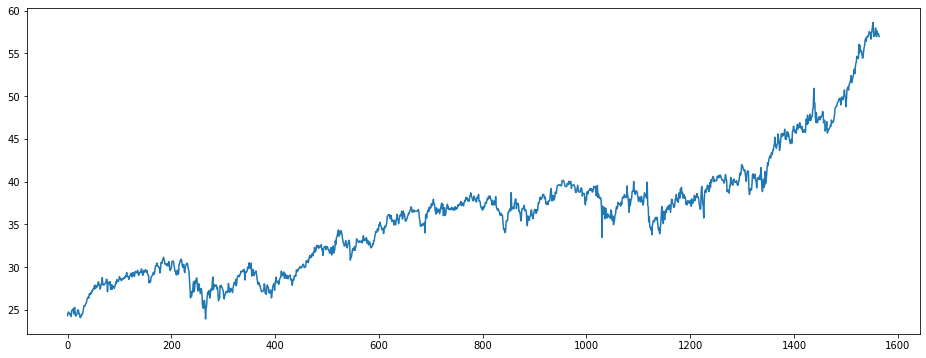

In [ ]:
dataset['Open'].plot(figsize=(16,6))

In [ ]:
dataset["Volume"] = dataset["Volume"].astype(float)

In [ ]:
dataset.rolling(7).mean().head(20)

,Open,High,Low,Close,Volume
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
6,24.548714,24.560143,24.301429,24.391286,14907.571429
7,24.533714,24.560143,24.341714,24.446571,8807.142857
8,24.572571,24.600429,24.384857,24.496857,7254.285714
9,24.602143,24.644714,24.478000,24.573286,7628.428571


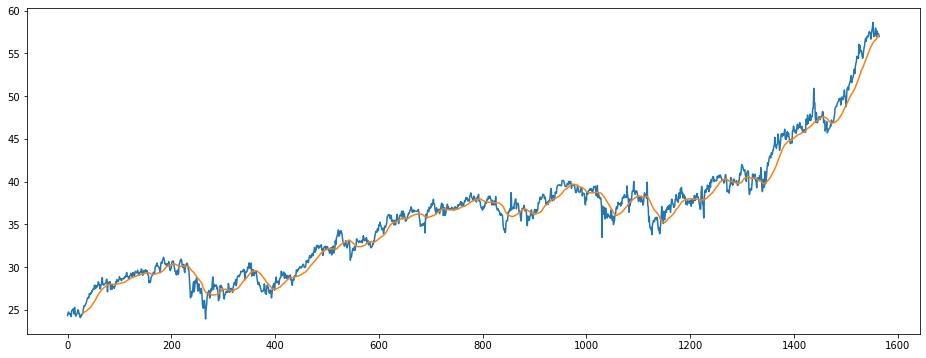

In [ ]:
dataset['Open'].plot(figsize=(16,6))
dataset.rolling(window=30).mean()["Close"].plot()

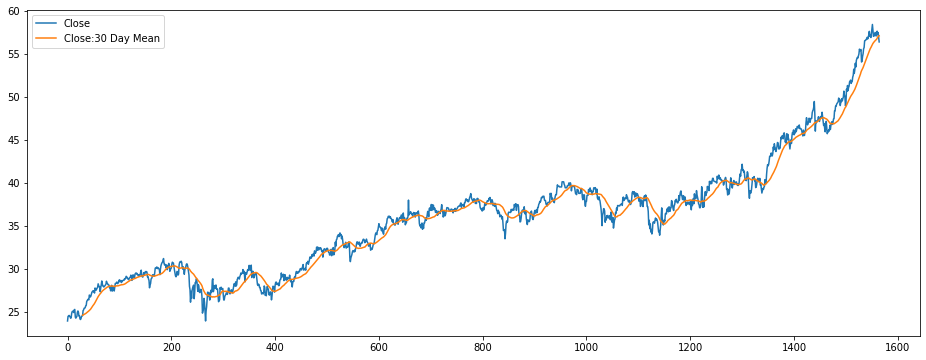

In [ ]:
dataset['Close:30 Day Mean']=dataset['Close'].rolling(window=30).mean()
dataset[['Close','Close:30 Day Mean']].plot(figsize=(16,6))

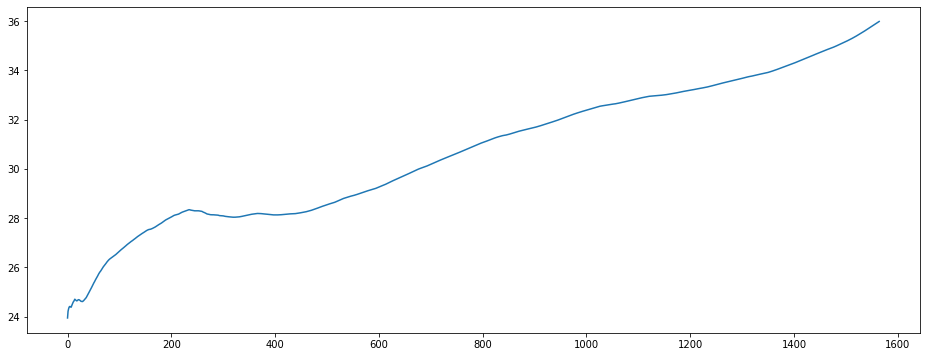

In [ ]:
dataset['Close'].expanding(min_periods=1).mean().plot(figsize=(16,6))

In [ ]:
training_set=dataset['Open']
training_set=pd.DataFrame(training_set)

In [ ]:
print(dataset.shape)

(1565, 6)


In [ ]:
dataset.isna().any()

Open                 False
High                 False
Low                  False
Close                False
Volume               False
Close:30 Day Mean     True
dtype: bool

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)

In [ ]:
X_train=[]
y_train=[]
for i in range(60,1565):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train,y_train=np.array(X_train),np.array(y_train)
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
regessor=Sequential()

In [ ]:
regessor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
regessor.add(Dropout(0.2))
regessor.add(LSTM(units=50,return_sequences=True))
regessor.add(Dropout(0.2))
regessor.add(LSTM(units=50,return_sequences=True))
regessor.add(Dropout(0.2))
regessor.add(LSTM(units=50))
regessor.add(Dropout(0.2))
regessor.add(Dense(units=1))

In [ ]:
regessor.compile(optimizer ='adam',loss='mean_squared_error')
regessor.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
48/48 [==============================] - 14s 121ms/step - loss: 0.0176
Epoch 2/100
48/48 [==============================] - 6s 121ms/step - loss: 0.0033
Epoch 3/100
48/48 [==============================] - 6s 122ms/step - loss: 0.0027
Epoch 4/100
48/48 [==============================] - 6s 124ms/step - loss: 0.0026
Epoch 5/100
48/48 [==============================] - 6s 121ms/step - loss: 0.0025
Epoch 6/100
48/48 [==============================] - 6s 122ms/step - loss: 0.0024
Epoch 7/100
48/48 [==============================] - 6s 125ms/step - loss: 0.0026
Epoch 8/100
48/48 [==============================] - 8s 165ms/step - loss: 0.0024
Epoch 9/100
48/48 [==============================] - 6s 123ms/step - loss: 0.0021
Epoch 10/100
48/48 [==============================] - 6s 124ms/step - loss: 0.0021
Epoch 11/100
48/48 [==============================] - 6s 122ms/step - loss: 0.0021
Epoch 12/100
48/48 [==============================] - 6s 123ms/step - loss: 0.0022
Epoch 13/100

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloadeds = drive.CreateFile({'id':'1PIuyDjJk0nAu4FPGDaiXa3Yt1qhKGMFc'}) # replace the id with id of file you want to access
downloadeds.GetContentFile('alfa.us.csv')


In [ ]:
dt=pd.read_csv('google1.csv',index_col ="Date",parse_dates=True)
real_price=dt.iloc[:,1:2].values
real_price.len()

NameError: ignored

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1353 entries, 2012-06-05 to 2017-11-10
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Open     1353 non-null   float64
 1   High     1353 non-null   float64
 2   Low      1353 non-null   float64
 3   Close    1353 non-null   float64
 4   Volume   1353 non-null   int64  
 5   OpenInt  1353 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 74.0 KB


In [ ]:
dt["Volume"]=dt["Volume"].astype(float)

In [ ]:
dt.drop("OpenInt",axis=1,inplace=True)

In [ ]:
test=dt['Open']
test=pd.DataFrame(test)
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1353 entries, 2012-06-05 to 2017-11-10
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1353 non-null   float64
dtypes: float64(1)
memory usage: 53.4 KB


In [ ]:
dataset_total =pd.concat((dataset['Open'],dt['Open']),axis=0)
inputs =dataset_total[len(dataset_total)-len(dt)-60:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)
X_test=[]
for i in range(60,1353):
	X_test.append(inputs[i-60:i,0])
X_test =np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted =regessor(X_test)
predicted=sc.inverse_transform(predicted)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
predicted=pd.DataFrame(predicted)
predicted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1293 entries, 0 to 1292
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1293 non-null   float64
dtypes: float64(1)
memory usage: 10.2 KB


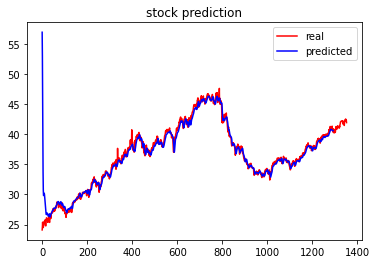

In [ ]:
plt.plot(real_price,color='red',label='real')
plt.plot(predicted,color='blue',label='predicted')
plt.title('stock prediction')
plt.legend()
plt.show()